#### Goal - predict which package of pumpkins will have the best pumpkin prices.


![regression image](\ml-regression.png)

### Questions
* When is the best time to buy pumpkins?
* What price can I expect of a case of miniature pumpkins?
* Should I buy them in half-bushel baskets or by the 1 1/9 bushel box? Let's keep digging into this data.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv("https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv")
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [36]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City Name        1757 non-null   object 
 1   Type             45 non-null     object 
 2   Package          1757 non-null   object 
 3   Variety          1752 non-null   object 
 4   Sub Variety      296 non-null    object 
 5   Grade            0 non-null      float64
 6   Date             1757 non-null   object 
 7   Low Price        1757 non-null   float64
 8   High Price       1757 non-null   float64
 9   Mostly Low       1654 non-null   float64
 10  Mostly High      1654 non-null   float64
 11  Origin           1754 non-null   object 
 12  Origin District  131 non-null    object 
 13  Item Size        1478 non-null   object 
 14  Color            1141 non-null   object 
 15  Environment      0 non-null      float64
 16  Unit of Sale     162 non-null    object 
 17  Quality       

In [37]:
pumpkins.describe()

,Grade,Low Price,High Price,Mostly Low,Mostly High,Environment,Quality,Condition,Appearance,Storage,Crop,Trans Mode,Unnamed: 24
count,0.0,1757.000000,1757.000000,1654.000000,1654.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,124.571338,132.970939,128.170550,132.491802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,83.876591,89.524958,86.512161,88.442967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.240000,0.240000,0.240000,0.240000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.000000,24.500000,24.625000,26.125000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,140.000000,150.000000,147.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,180.000000,200.000000,185.000000,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,480.000000,480.000000,480.000000,480.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


In [39]:
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City Name   415 non-null    object 
 1   Package     415 non-null    object 
 2   Variety     415 non-null    object 
 3   Date        415 non-null    object 
 4   Low Price   415 non-null    float64
 5   High Price  415 non-null    float64
dtypes: float64(2), object(4)
memory usage: 38.9+ KB


<AxesSubplot:xlabel='DayOfYear', ylabel='Price'>

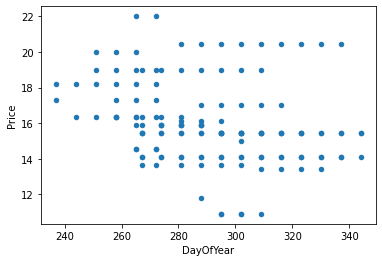

In [40]:
pie_pumpkins = new_pumpkins[new_pumpkins['Variety']=='PIE TYPE']
pie_pumpkins.plot.scatter('DayOfYear','Price') 

# price over the period of time

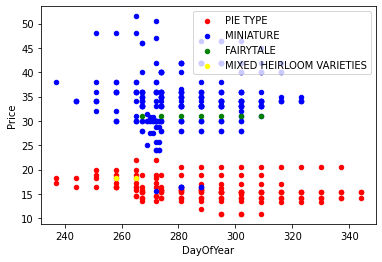

In [57]:
ax=None
colors = ['red','blue','green','yellow']
for i,var in enumerate(new_pumpkins['Variety'].unique()):
    df = new_pumpkins[new_pumpkins['Variety']==var]
    ax = df.plot.scatter('DayOfYear','Price',ax=ax,c=colors[i],label=var)

# variety has more effect on the overall price than the actual selling date.

# Regression

Linear Regression line - show relationship between variables, make accurate predictions and find the accuracy.
Math: Y = a + bX

X is the 'explanatory variable'. Y is the 'dependent variable'. The slope of the line is b and a is the y-intercept, which refers to the value of Y when X = 0


# Simple Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [42]:
X = pie_pumpkins['DayOfYear'].to_numpy().reshape(-1,1)
y = pie_pumpkins['Price']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

To see how accurate our model is, we can predict prices on a test dataset, and then measure how close our predictions are to the expected values. This can be done using mean square error (MSE) metrics, which is the mean of all squared differences between expected and predicted value.

In [45]:
pred = lin_reg.predict(X_test)

mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 2.77 (17.2%)


Our error seems to be around 2 points, which is ~17%. Not too good.

In [46]:
#another indicator of model quality is the coefficient of determination
score = lin_reg.score(X_train,y_train)
print('Model determination: ', score)

Model determination:  0.04460606335028361


If the value is 0, it means that the model does not take input data into account, and acts as the worst linear predictor, which is simply a mean value of the result. The value of 1 means that we can perfectly predict all expected outputs. In our case, the coefficient is around 0.06, which is quite low.

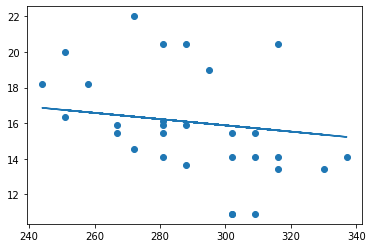

In [47]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred)

# Polynomial Regression

Another type of Linear Regression is Polynomial Regression. While sometimes there's a linear relationship between variables - the bigger the pumpkin in volume, the higher the price - sometimes these relationships can't be plotted as a plane or straight line

Take another look at the relationship between Date and Price. Does this scatterplot seem like it should necessarily be analyzed by a straight line? Can't prices fluctuate? In this case, you can try polynomial regression.

✅ Polynomials are mathematical expressions that might consist of one or more variables and coefficients

Polynomial regression creates a curved line to better fit nonlinear data. In our case, if we include a squared DayOfYear variable into input data, we should be able to fit our data with a parabolic curve, which will have a minimum at a certain point within the year.

A pipeline is a chain of estimators. In our case, we will create a pipeline that first adds polynomial features to our model, and then trains the regression

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

Using PolynomialFeatures(2) means that we will include all second-degree polynomials from the input data. In our case it will just mean DayOfYear2, but given two input variables X and Y, this will add X2, XY and Y2. We may also use higher degree polynomials if we want.

Pipelines can be used in the same manner as the original LinearRegression object, i.e. we can fit the pipeline, and then use predict to get the prediction results. 

##### Using Polynomial Regression, we can get slightly lower MSE and higher determination, but not significantly. We need to take into account other features!

## Categorical Features

In the ideal world, we want to be able to predict prices for different pumpkin varieties using the same model. However, the Variety column is somewhat different from columns like Month, because it contains non-numeric values. Such columns are called categorical.

To take variety into account, we first need to convert it to numeric form, or encode it. There are several way we can do it:

* Simple numeric encoding will build a table of different varieties, and then replace the variety name by an index in that table. This is not the best idea for linear regression, because linear regression takes the actual numeric value of the index, and adds it to the result, multiplying by some coefficient. In our case, the relationship between the index number and the price is clearly non-linear, even if we make sure that indices are ordered in some specific way.
* One-hot encoding will replace the Variety column by 4 different columns, one for each variety. Each column will contain 1 if the corresponding row is of a given variety, and 0 otherwise. This means that there will be four coefficients in linear regression, one for each pumpkin variety, responsible for "starting price" (or rather "additional price") for that particular variety.

In [49]:
#one-hot encoding
pd.get_dummies(new_pumpkins['Variety'])

,FAIRYTALE,MINIATURE,MIXED HEIRLOOM VARIETIES,PIE TYPE
70,0,0,0,1
71,0,0,0,1
72,0,0,0,1
73,0,0,0,1
74,0,0,0,1
...,...,...,...,...
1738,0,1,0,0
1739,0,1,0,0
1740,0,1,0,0
1741,0,1,0,0


In [50]:
X = pd.get_dummies(new_pumpkins['Variety'])
y = new_pumpkins['Price']

In [51]:
# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

Mean error: 5.26 (20.1%)


# Putting it all together

To make the best model, we can use combined (one-hot encoded categorical + numeric) data from the above example together with Polynomial Regression.

In [52]:
# set up training data
X = pd.get_dummies(new_pumpkins['Variety']) \
        .join(new_pumpkins['Month']) \
        .join(pd.get_dummies(new_pumpkins['City'])) \
        .join(pd.get_dummies(new_pumpkins['Package']))
y = new_pumpkins['Price']

# make train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# setup and train the pipeline
pipeline = make_pipeline(PolynomialFeatures(2), LinearRegression())
pipeline.fit(X_train,y_train)

# predict results for test data
pred = pipeline.predict(X_test)

# calculate MSE and determination
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')

score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 2.53 (9.26%)
Model determination:  0.9549883495698954


## Resources
- [Logistic regression to predict categories](https://microsoft.github.io/ML-For-Beginners/#/2-Regression/4-Logistic/README)
- [Skilling Resources](https://aka.ms/MLskilling)